In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load VT experimental data
Cp_x_0_HILL = pd.read_csv("../DATA/Cp_x_0_HILL.csv", names=['z/H', 'Cp'], header=None)
Cp_z_0_HILL = pd.read_csv("../DATA/Cp_z_0_HILL.csv", names=['x/H', 'Cp'], header=None)
print(Cp_x_0_HILL)
print(Cp_z_0_HILL)

         z/H        Cp
0  -2.455505 -0.550452
1  -2.177979 -0.875602
2  -1.888386 -1.254518
3  -1.598793 -1.490060
4  -1.321267 -1.600151
5  -1.019608 -1.577108
6  -0.717949 -1.257078
7  -0.440422 -0.780873
8  -0.187029 -0.622139
9   0.006033 -0.606777
10  0.174962 -0.619578
11  0.416290 -0.798795
12  0.561086 -0.998494
13  0.717949 -1.223795
14  0.850679 -1.426054
15  0.995475 -1.618072
16  1.152338 -1.620633
17  1.285068 -1.620633
18  1.574661 -1.502861
19  1.864253 -1.249398
20  2.153846 -0.919127
         x/H        Cp
0  -7.762803 -0.011585
1  -6.964960 -0.005869
2  -6.102426 -0.003963
3  -5.326146 -0.002058
4  -4.355795  0.058918
5  -3.816712  0.104649
6  -3.557951  0.133232
7  -2.458221  0.367607
8  -2.156334  0.388567
9  -1.854447  0.327591
10 -1.574124  0.188491
11 -1.444744  0.068445
12 -1.293801 -0.116387
13 -1.142857 -0.278354
14 -1.013477 -0.463186
15 -0.862534 -0.651829
16 -0.711590 -0.768064
17 -0.560647 -0.779497
18 -0.452830 -0.747104
19 -0.172507 -0.619436
20  0.02156

In [3]:
# Freestream values
pinf   = 0.0 #93.945 # Pa
rhoinf = 1.0 #1.103  # kg/m^3
uinf   = 1.0 #22.0   # m/s

In [69]:
# Load RANS solutions

BSL_VT_11M = 'VT_NASA_BeVERLI_3D_Hill_Baseline_RANS_k_Omega_SST_45Deg_Mesh_VT_11M_Re_250k/postProcessing/sampleDict/50000/'
#BSL_VT_11M = 'VT_NASA_BeVERLI_3D_Hill_Baseline_RANS_k_Omega_SST_45Deg_Mesh_VT_11M_Re_250k/postProcessing/surfaces/50000'
#BSL_VT_11M = 'VT_NASA_BeVERLI_3D_Hill_Baseline_RANS_k_Omega_SST_45Deg_Mesh_VT_11M_Re_250k/postProcessing/sampleDict/110000'

GEP_VT_11M_OFF_ON = 'VT_NASA_BeVERLI_3D_Hill_GEP_aijRij_hat_RANS_45Deg_Mesh_VT_11M_run0_aij_OFF_Rij_ON/postProcessing/sampleDict/50000/'
GEP_VT_11M_ON_ON  = 'VT_NASA_BeVERLI_3D_Hill_GEP_aijRij_hat_RANS_45Deg_Mesh_VT_11M_run0_aij_ON_Rij_ON/postProcessing/sampleDict/68000/'
GEP_VT_11M_ON_OFF = 'VT_NASA_BeVERLI_3D_Hill_GEP_aijRij_hat_RANS_45Deg_Mesh_VT_11M_run0_aij_ON_Rij_OFF/postProcessing/sampleDict/100000/'

BSL_S3_L4  = 'VT_NASA_BeVERLI_3D_Hill_Baseline_RANS_k_Omega_SST_45Deg_Mesh_VT_Set3L4_Re_250k/postProcessing/sampleDict/35000/'
GEP_S3_L4  = 'VT_NASA_BeVERLI_3D_Hill_GEP______RANS_k_Omega_SST_45Deg_Mesh_VT_Set3L4_Re_250k/postProcessing/sampleDict/24500/'

In [28]:
BSL_VT_11M_p_X_Plane   = pd.read_csv(BSL_VT_11M+"p_X_0_Plane.csv")
BSL_VT_11M_p_Z_Plane   = pd.read_csv(BSL_VT_11M+"p_Z_0_Plane.csv")
BSL_VT_11M_p_bott_wall = pd.read_csv(BSL_VT_11M+"p_bott_wall.csv")

BSL_VT_11M_p_X_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
BSL_VT_11M_p_Z_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
BSL_VT_11M_p_bott_wall.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

BSL_VT_11M_p_X_Plane['Cp']   = (BSL_VT_11M_p_X_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
BSL_VT_11M_p_Z_Plane['Cp']   = (BSL_VT_11M_p_Z_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
BSL_VT_11M_p_bott_wall['Cp'] = (BSL_VT_11M_p_bott_wall['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#BSL_VT_11M_p_Z_Plane['x/H']  = - BSL_VT_11M_p_Z_Plane['x/H'] 
BSL_VT_11M_p_X_Plane['z/H']   = - BSL_VT_11M_p_X_Plane['z/H'] 
BSL_VT_11M_p_bott_wall['z/H'] = - BSL_VT_11M_p_bott_wall['z/H'] 

#eps = 0.01
#BSL_VT_11M_p_X_Plane_   = BSL_VT_11M_p_X_Plane[BSL_VT_11M_p_X_Plane['z/H'] == 0]
#BSL_VT_11M_p_Z_Plane_   = BSL_VT_11M_p_Z_Plane[BSL_VT_11M_p_Z_Plane['x/H'] == 0]
#BSL_VT_11M_p_bott_wall_ = BSL_VT_11M_p_bott_wall[BSL_VT_11M_p_bott_wall['z/H'] == 0]

In [6]:
GEP_VT_11M_p_X_Plane_OFF_ON   = pd.read_csv(GEP_VT_11M_OFF_ON+"p_X_0_Plane.csv")
GEP_VT_11M_p_Z_Plane_OFF_ON   = pd.read_csv(GEP_VT_11M_OFF_ON+"p_Z_0_Plane.csv")
GEP_VT_11M_p_bott_wall_OFF_ON = pd.read_csv(GEP_VT_11M_OFF_ON+"p_bott_wall.csv")

GEP_VT_11M_p_X_Plane_OFF_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_Z_Plane_OFF_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_bott_wall_OFF_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

GEP_VT_11M_p_X_Plane_OFF_ON['Cp']   = (GEP_VT_11M_p_X_Plane_OFF_ON['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_Z_Plane_OFF_ON['Cp']   = (GEP_VT_11M_p_Z_Plane_OFF_ON['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_bott_wall_OFF_ON['Cp'] = (GEP_VT_11M_p_bott_wall_OFF_ON['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#GEP_VT_11M_p_Z_Plane_OFF_ON['x/H']  = - GEP_VT_11M_p_Z_Plane_OFF_ON['x/H'] 
GEP_VT_11M_p_X_Plane_OFF_ON['z/H']   = - GEP_VT_11M_p_X_Plane_OFF_ON['z/H'] 
GEP_VT_11M_p_bott_wall_OFF_ON['z/H'] = - GEP_VT_11M_p_bott_wall_OFF_ON['z/H'] 

#GEP_VT_11M_p_X_Plane_OFF_ON_   = GEP_VT_11M_p_X_Plane_OFF_ON[GEP_VT_11M_p_X_Plane_OFF_ON['z/H'] == 0]
#GEP_VT_11M_p_Z_Plane_OFF_ON_   = GEP_VT_11M_p_Z_Plane_OFF_ON[GEP_VT_11M_p_Z_Plane_OFF_ON['x/H'] == 0]
#GEP_VT_11M_p_bott_wall_OFF_ON_ = GEP_VT_11M_p_bott_wall_OFF_ON[GEP_VT_11M_p_bott_wall_OFF_ON['z/H'] == 0]

In [7]:
GEP_VT_11M_p_X_Plane_ON_ON   = pd.read_csv(GEP_VT_11M_ON_ON+"p_X_0_Plane.csv")
GEP_VT_11M_p_Z_Plane_ON_ON   = pd.read_csv(GEP_VT_11M_ON_ON+"p_Z_0_Plane.csv")
GEP_VT_11M_p_bott_wall_ON_ON = pd.read_csv(GEP_VT_11M_ON_ON+"p_bott_wall.csv")

GEP_VT_11M_p_X_Plane_ON_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_Z_Plane_ON_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_bott_wall_ON_ON.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

GEP_VT_11M_p_X_Plane_ON_ON['Cp']   = (GEP_VT_11M_p_X_Plane_ON_ON['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_Z_Plane_ON_ON['Cp']   = (GEP_VT_11M_p_Z_Plane_ON_ON['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_bott_wall_ON_ON['Cp'] = (GEP_VT_11M_p_bott_wall_ON_ON['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#GEP_VT_11M_p_Z_Plane_ON_ON['x/H']  = - GEP_VT_11M_p_Z_Plane_ON_ON['x/H'] 
GEP_VT_11M_p_X_Plane_ON_ON['z/H']   = - GEP_VT_11M_p_X_Plane_ON_ON['z/H'] 
GEP_VT_11M_p_bott_wall_ON_ON['z/H'] = - GEP_VT_11M_p_bott_wall_ON_ON['z/H'] 

#GEP_VT_11M_p_X_Plane_ON_ON_   = GEP_VT_11M_p_X_Plane_ON_ON[GEP_VT_11M_p_X_Plane_ON_ON['z/H'] == 0]
#GEP_VT_11M_p_Z_Plane_ON_ON_   = GEP_VT_11M_p_Z_Plane_ON_ON[GEP_VT_11M_p_Z_Plane_ON_ON['x/H'] == 0]
#GEP_VT_11M_p_bott_wall_ON_ON_ = GEP_VT_11M_p_bott_wall_ON_ON[GEP_VT_11M_p_bott_wall_ON_ON['z/H'] == 0]

In [8]:
GEP_VT_11M_p_X_Plane_ON_OFF   = pd.read_csv(GEP_VT_11M_ON_OFF+"p_X_0_Plane.csv")
GEP_VT_11M_p_Z_Plane_ON_OFF   = pd.read_csv(GEP_VT_11M_ON_OFF+"p_Z_0_Plane.csv")
GEP_VT_11M_p_bott_wall_ON_OFF = pd.read_csv(GEP_VT_11M_ON_OFF+"p_bott_wall.csv")

GEP_VT_11M_p_X_Plane_ON_OFF.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_Z_Plane_ON_OFF.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_VT_11M_p_bott_wall_ON_OFF.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

GEP_VT_11M_p_X_Plane_ON_OFF['Cp']   = (GEP_VT_11M_p_X_Plane_ON_OFF['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_Z_Plane_ON_OFF['Cp']   = (GEP_VT_11M_p_Z_Plane_ON_OFF['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_VT_11M_p_bott_wall_ON_OFF['Cp'] = (GEP_VT_11M_p_bott_wall_ON_OFF['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#GEP_VT_11M_p_Z_Plane_ON_OFF['x/H']  = - GEP_VT_11M_p_Z_Plane_ON_OFF['x/H'] 
GEP_VT_11M_p_X_Plane_ON_OFF['z/H']   = - GEP_VT_11M_p_X_Plane_ON_OFF['z/H'] 
GEP_VT_11M_p_bott_wall_ON_OFF['z/H'] = - GEP_VT_11M_p_bott_wall_ON_OFF['z/H'] 

#GEP_VT_11M_p_X_Plane_ON_OFF_   = GEP_VT_11M_p_X_Plane_ON_OFF[GEP_VT_11M_p_X_Plane_ON_OFF['z/H'] == 0]
#GEP_VT_11M_p_Z_Plane_ON_OFF_   = GEP_VT_11M_p_Z_Plane_ON_OFF[GEP_VT_11M_p_Z_Plane_ON_OFF['x/H'] == 0]
#GEP_VT_11M_p_bott_wall_ON_OFF_ = GEP_VT_11M_p_bott_wall_ON_OFF[GEP_VT_11M_p_bott_wall_ON_OFF['z/H'] == 0]

In [65]:
BSL_S3_L4_p_X_Plane   = pd.read_csv(BSL_S3_L4+"p_X_0_Plane.csv")
BSL_S3_L4_p_Z_Plane   = pd.read_csv(BSL_S3_L4+"p_Z_0_Plane.csv")
BSL_S3_L4_p_bott_wall = pd.read_csv(BSL_S3_L4+"p_bott_wall.csv")

BSL_S3_L4_p_X_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
BSL_S3_L4_p_Z_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
BSL_S3_L4_p_bott_wall.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

BSL_S3_L4_p_X_Plane['Cp']   = (BSL_S3_L4_p_X_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
BSL_S3_L4_p_Z_Plane['Cp']   = (BSL_S3_L4_p_Z_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
BSL_S3_L4_p_bott_wall['Cp'] = (BSL_S3_L4_p_bott_wall['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#BSL_S3_L4_p_Z_Plane['x/H']  = - BSL_S3_L4_p_Z_Plane['x/H'] 
BSL_S3_L4_p_X_Plane['z/H']   = - BSL_S3_L4_p_X_Plane['z/H'] 
BSL_S3_L4_p_bott_wall['z/H'] = - BSL_S3_L4_p_bott_wall['z/H'] 

In [80]:
GEP_S3_L4_p_X_Plane   = pd.read_csv(GEP_S3_L4+"p_X_0_Plane.csv")
GEP_S3_L4_p_Z_Plane   = pd.read_csv(GEP_S3_L4+"p_Z_0_Plane.csv")
GEP_S3_L4_p_bott_wall = pd.read_csv(GEP_S3_L4+"p_bott_wall.csv")

GEP_S3_L4_p_X_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_S3_L4_p_Z_Plane.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)
GEP_S3_L4_p_bott_wall.rename(columns={'Points:0': 'x/H', 'Points:1': 'y/H', 'Points:2': 'z/H', 'vtkOriginalIndices': 'Cell'}, inplace=True)

GEP_S3_L4_p_X_Plane['Cp']   = (GEP_S3_L4_p_X_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_S3_L4_p_Z_Plane['Cp']   = (GEP_S3_L4_p_Z_Plane['p']   - pinf) / (0.5 * rhoinf * uinf * uinf)
GEP_S3_L4_p_bott_wall['Cp'] = (GEP_S3_L4_p_bott_wall['p'] - pinf) / (0.5 * rhoinf * uinf * uinf)

#GEP_S3_L4_p_Z_Plane['x/H']   = - GEP_S3_L4_p_Z_Plane['x/H'] 
#GEP_S3_L4_p_X_Plane['z/H']   = - GEP_S3_L4_p_X_Plane['z/H'] 
#GEP_S3_L4_p_bott_wall['z/H'] = - GEP_S3_L4_p_bott_wall['z/H'] 

In [10]:
# Use numpy.unique() to unique values in multiple columns 
#column_values = p_Z_Plane[['x/H', 'y/H', 'z/H', 'Cp']].values
#df2 = np.unique(column_values)
#print(df2.shape)

In [11]:
#df_Z_unique = pd.concat([p_Z_Plane['x/H'],p_Z_Plane['y/H'],p_Z_Plane['z/H'],p_Z_Plane['Cp']]).unique()

In [12]:
#df_Z_unique

In [13]:
#p_X_Plane['x/H'].drop_duplicates()

In [14]:
#p_X_Plane['y/H'].drop_duplicates()

In [15]:
#p_Z_Plane['y/H'].drop_duplicates()

In [16]:
#p_X_Plane['z/H'].drop_duplicates()

In [17]:
#p_X_Plane_unique_x = p_X_Plane['x/H'].value_counts()
#p_X_Plane_unique_y = p_X_Plane['y/H'].value_counts()

#p_X_Plane_unique_x = p_X_Plane['x/H'].unique()
#p_X_Plane_unique_y = p_X_Plane['y/H'].unique()
#print(sorted(p_X_Plane_unique_y))

In [18]:
#p_Z_Plane_unique_y = p_Z_Plane['y/H'].unique()
#print(sorted(p_Z_Plane_unique_y))

In [19]:
#print(sorted(p_X_Plane_unique_x))
#print(sorted(p_X_Plane_unique_y))

In [20]:
#p_X_Plane_unique_x.shape

In [21]:
#GEP_VT_11M_p_X_Plane_ON_OFF.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'g', grid=True);
#GEP_VT_11M_p_X_Plane_ON_ON.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'r', grid=True);
#GEP_VT_11M_p_X_Plane_OFF_ON.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'b', grid=True);
#BSL_VT_11M_p_X_Plane.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'm', grid=True);

In [22]:
#GEP_VT_11M_p_Z_Plane_ON_OFF.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'g', grid=True);
#GEP_VT_11M_p_Z_Plane_ON_ON.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'r', grid=True);
#GEP_VT_11M_p_Z_Plane_OFF_ON.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'b', grid=True);
#BSL_VT_11M_p_Z_Plane.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'm', grid=True);

In [23]:
#GEP_VT_11M_p_bott_wall_ON_OFF.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'g', grid=True);
#GEP_VT_11M_p_bott_wall_ON_ON.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'r', grid=True);
#GEP_VT_11M_p_bott_wall_OFF_ON.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'b', grid=True);
#BSL_VT_11M_p_bott_wall.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'm', grid=True);

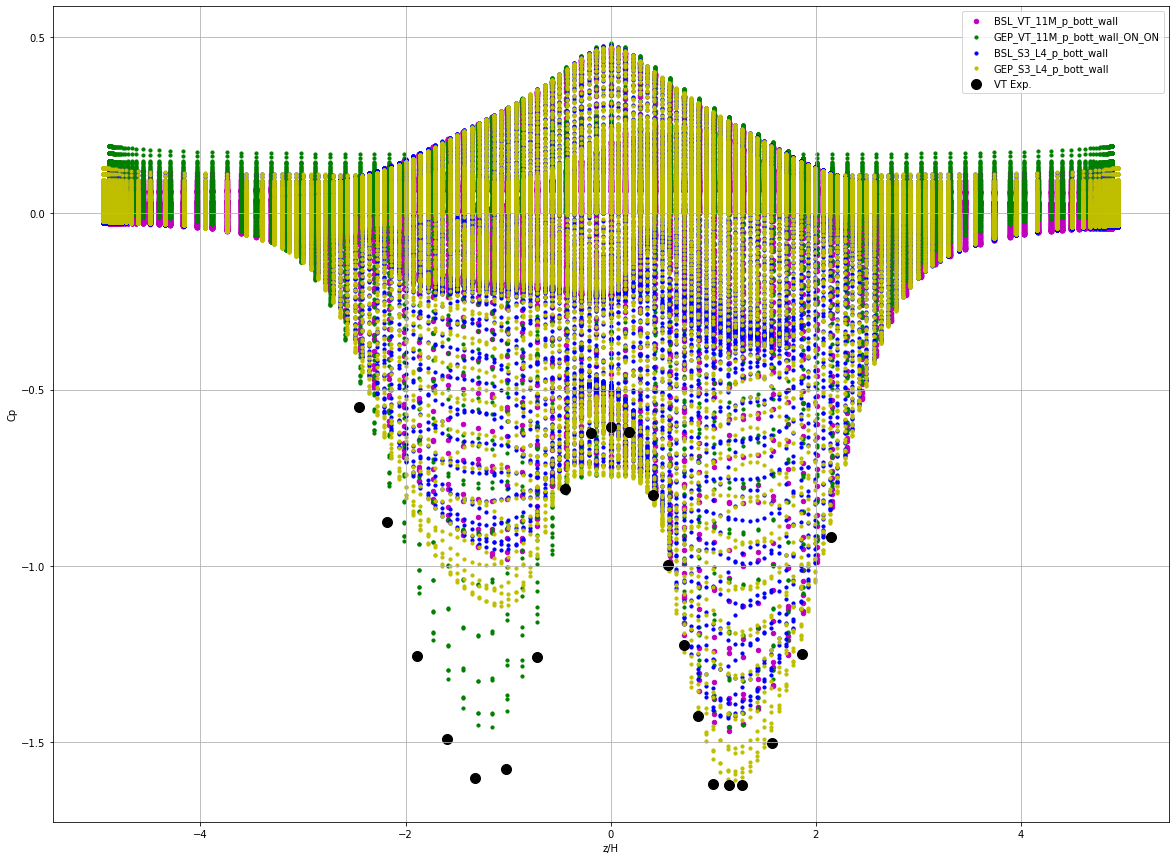

In [81]:
tmp = GEP_VT_11M_p_bott_wall_ON_ON[GEP_VT_11M_p_bott_wall_ON_ON['x/H']==0]

fig = plt.figure(figsize=(20,15))
plt.scatter(BSL_VT_11M_p_bott_wall['z/H'],         BSL_VT_11M_p_bott_wall['Cp'],        s = 20, c = 'm', label = 'BSL_VT_11M_p_bott_wall')
#plt.scatter(GEP_VT_11M_p_bott_wall_ON_OFF['z/H'], GEP_VT_11M_p_bott_wall_ON_OFF['Cp'], s = 10, c = 'r', label = 'GEP_VT_11M_p_bott_wall_ON_OFF')
plt.scatter(GEP_VT_11M_p_bott_wall_ON_ON['z/H'],   GEP_VT_11M_p_bott_wall_ON_ON['Cp'],  s = 10, c = 'g', label = 'GEP_VT_11M_p_bott_wall_ON_ON')
#plt.scatter(GEP_VT_11M_p_bott_wall_OFF_ON['z/H'], GEP_VT_11M_p_bott_wall_OFF_ON['Cp'], s = 10, c = 'b', label = 'GEP_VT_11M_p_bott_wall_OFF_ON')
plt.scatter(BSL_S3_L4_p_bott_wall['z/H'],          BSL_S3_L4_p_bott_wall['Cp'],         s = 10, c = 'b', label = 'BSL_S3_L4_p_bott_wall')
plt.scatter(GEP_S3_L4_p_bott_wall['z/H'],          GEP_S3_L4_p_bott_wall['Cp'],         s = 10, c = 'y', label = 'GEP_S3_L4_p_bott_wall')
#plt.scatter(tmp['z/H'],                           tmp['Cp'],                           s = 50, c = 'y', label = 'tmp')
plt.scatter(Cp_x_0_HILL['z/H'],                    Cp_x_0_HILL['Cp'],                   s = 100, c = 'k', label = 'VT Exp.')
plt.xlabel('z/H')
plt.ylabel('Cp')
plt.grid()
plt.legend()
plt.show()
plt.close()

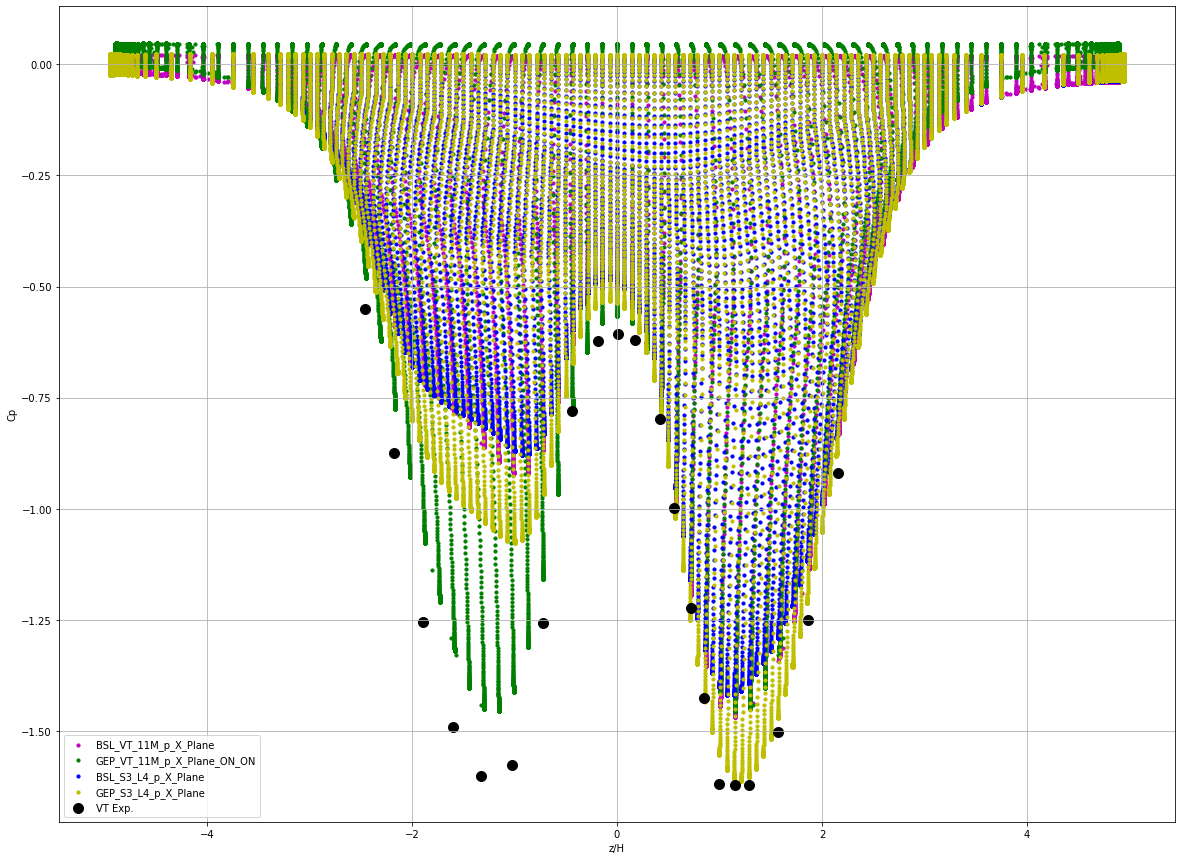

In [83]:
tmp = GEP_VT_11M_p_X_Plane_ON_ON[GEP_VT_11M_p_X_Plane_ON_ON['y/H']==0]

fig = plt.figure(figsize=(20,15))
plt.scatter(BSL_VT_11M_p_X_Plane['z/H'],         BSL_VT_11M_p_X_Plane['Cp'],        s = 10, c = 'm', label = 'BSL_VT_11M_p_X_Plane')
#plt.scatter(GEP_VT_11M_p_X_Plane_ON_OFF['z/H'], GEP_VT_11M_p_X_Plane_ON_OFF['Cp'], s = 10, c = 'r', label = 'GEP_VT_11M_p_X_Plane_ON_OFF')
plt.scatter(GEP_VT_11M_p_X_Plane_ON_ON['z/H'],   GEP_VT_11M_p_X_Plane_ON_ON['Cp'],  s = 10, c = 'g', label = 'GEP_VT_11M_p_X_Plane_ON_ON')
#plt.scatter(tmp['z/H'],                         tmp['Cp'],                         s = 50, c = 'y', label = 'tmp')
#plt.scatter(GEP_VT_11M_p_X_Plane_OFF_ON['z/H'], GEP_VT_11M_p_X_Plane_OFF_ON['Cp'], s = 10, c = 'b', label = 'GEP_VT_11M_p_X_Plane_OFF_ON')
plt.scatter(BSL_S3_L4_p_X_Plane['z/H'],          BSL_S3_L4_p_X_Plane['Cp'],         s = 10, c = 'b', label = 'BSL_S3_L4_p_X_Plane')
plt.scatter(GEP_S3_L4_p_X_Plane['z/H'],          GEP_S3_L4_p_X_Plane['Cp'],         s = 10, c = 'y', label = 'GEP_S3_L4_p_X_Plane')
plt.scatter(Cp_x_0_HILL['z/H'],                  Cp_x_0_HILL['Cp'],                 s = 100, c = 'k', label = 'VT Exp.')
plt.xlabel('z/H')
plt.ylabel('Cp')
plt.grid()
plt.legend()
plt.show()
plt.close()

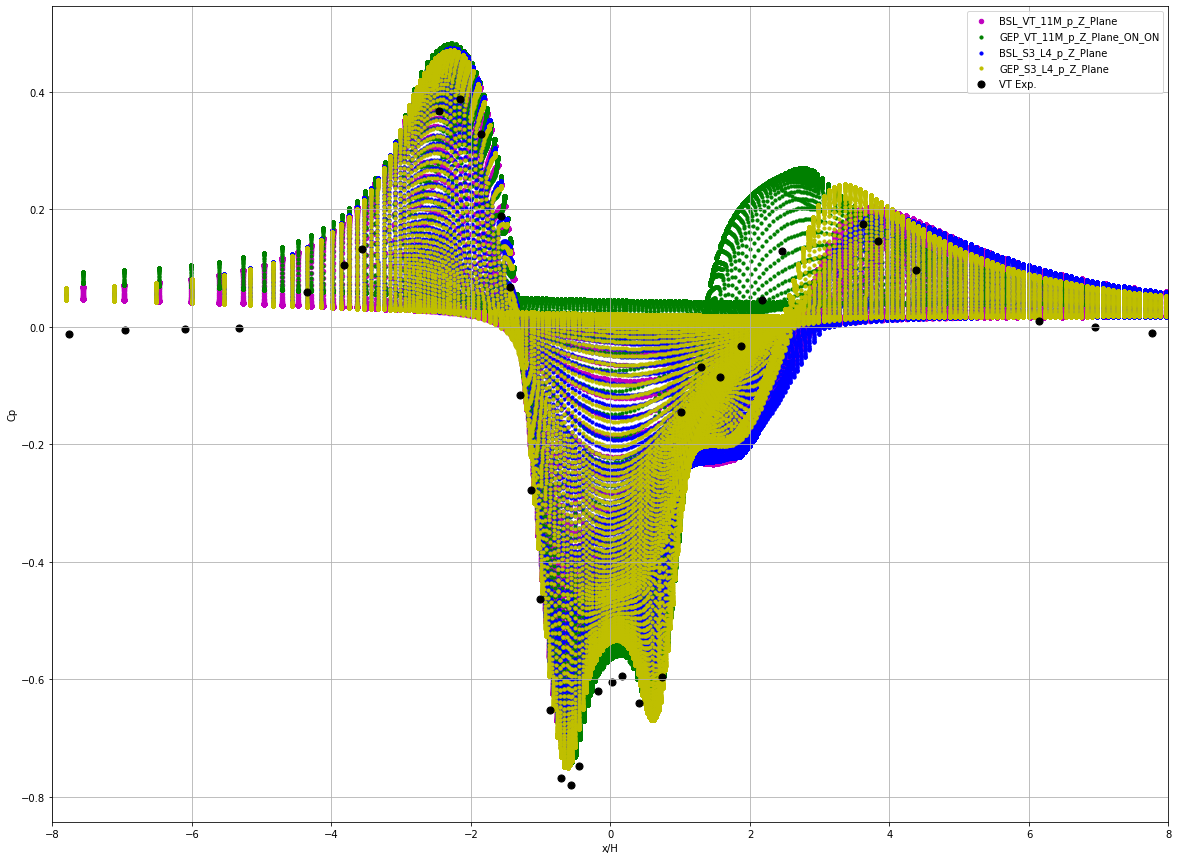

In [84]:
tmp = GEP_VT_11M_p_Z_Plane_ON_ON[GEP_VT_11M_p_Z_Plane_ON_ON['y/H']==0]

fig = plt.figure(figsize=(20,15))
plt.scatter(BSL_VT_11M_p_Z_Plane['x/H'],         BSL_VT_11M_p_Z_Plane['Cp'],        s = 20, c = 'm', label = 'BSL_VT_11M_p_Z_Plane')
#plt.scatter(GEP_VT_11M_p_Z_Plane_ON_OFF['x/H'], GEP_VT_11M_p_Z_Plane_ON_OFF['Cp'], s = 10, c = 'r', label = 'GEP_VT_11M_p_Z_Plane_ON_OFF')
plt.scatter(GEP_VT_11M_p_Z_Plane_ON_ON['x/H'],   GEP_VT_11M_p_Z_Plane_ON_ON['Cp'],  s = 10, c = 'g', label = 'GEP_VT_11M_p_Z_Plane_ON_ON')
#plt.scatter(GEP_VT_11M_p_Z_Plane_OFF_ON['x/H'], GEP_VT_11M_p_Z_Plane_OFF_ON['Cp'], s = 10, c = 'b', label = 'GEP_VT_11M_p_Z_Plane_OFF_ON')
plt.scatter(BSL_S3_L4_p_Z_Plane['x/H'],          BSL_S3_L4_p_Z_Plane['Cp'],         s = 10, c = 'b', label = 'BSL_S3_L4_p_Z_Plane')
plt.scatter(GEP_S3_L4_p_Z_Plane['x/H'],          GEP_S3_L4_p_Z_Plane['Cp'],         s = 10, c = 'y', label = 'GEP_S3_L4_p_Z_Plane')
#plt.scatter(tmp['x/H'],                         tmp['Cp'],                         s = 50, c = 'y', label = 'tmp')
plt.scatter(Cp_z_0_HILL['x/H'],                  Cp_z_0_HILL['Cp'],                 s = 50, c = 'k', label = 'VT Exp.')
plt.xlabel('x/H')
plt.ylabel('Cp')
plt.xlim([-8, 8])
plt.grid()
plt.legend()
plt.show()
plt.close()

In [29]:
#GEP_VT_11M_p_X_Plane.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'g', grid=True);
#BSL_VT_11M_p_X_Plane.plot.scatter(figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'g', grid=True);
#BSL_S3_L4_p_X_Plane.plot.scatter( figsize=(20,10), x = 'z/H', y = 'y/H', s = 10, c = 'g', grid=True);

In [307]:
#GEP_VT_11M_p_X_Plane.plot.scatter(x = 'z/H', y = 'Cp', s = 10, c = 'g', grid=True)
#BSL_VT_11M_p_X_Plane.plot.scatter(x = 'z/H', y = 'Cp', s = 10, c = 'g', grid=True)
#BSL_S3_L4_p_X_Plane.plot.scatter( x = 'z/H', y = 'Cp', s = 10, c = 'g', grid=True

In [30]:
#fig = plt.figure(figsize=(20,10))
#plt.scatter(GEP_VT_11M_p_X_Plane['z/H'], GEP_VT_11M_p_X_Plane['Cp'], s = 10, c = 'r', label = 'GEP_VT_11M_p_X_Plane')
#plt.scatter(BSL_VT_11M_p_X_Plane['z/H'], BSL_VT_11M_p_X_Plane['Cp'], s = 10, c = 'g', label = 'BSL_VT_11M_p_X_Plane')
##plt.scatter(BSL_S3_L4_p_X_Plane['z/H'],  BSL_S3_L4_p_X_Plane['Cp'],  s = 10, c = 'b', label = 'BSL_S3_L4_p_X_Plane')
#plt.scatter(Cp_x_0_HILL['z/H'],          Cp_x_0_HILL['Cp'],          s = 50, c = 'k', label = 'VT Exp.')
#plt.xlabel('z/H')
#plt.ylabel('Cp')
#plt.grid()
#plt.legend()
#plt.show()
#plt.close()

In [309]:
#p_X_Plane.plot.line(figsize=(20,10), x = 'z/H', y = 'Cp', c = 'g', grid=True);

In [310]:
#p_X_Plane_Ymin = p_X_Plane.groupby('z/H')['x/H', 'y/H', 'z/H', 'Cp'].min()
#p_X_Plane_Ymin

In [311]:
#p_X_Plane_Ymin.plot.scatter(figsize=(20,10), x = 'z/H', y = 'Cp', s = 10, c = 'g', grid=True)

In [312]:
#p_Z_Plane_drop = p_X_Plane_Ymin.drop_duplicates(subset=['y/H'])
#p_Z_Plane_drop

In [313]:
#p_Z_Plane_drop.plot.scatter(figsize=(20,10), x = 'z/H', y = 'Cp', s = 10, c = 'g', grid=True)

In [314]:
#plt.figure(figsize=(20, 10), dpi=300)
#plt.scatter(p_X_Plane_Ymin['z/H'], p_X_Plane_Ymin['Cp'],  c = 'g', s = 50, label = 'SST baseline')
#plt.scatter(p_Z_Plane_drop['z/H'], p_Z_Plane_drop['Cp'],  c = 'm', s = 50, label = 'SST baseline dropped')
#plt.scatter(Cp_x_0_HILL['z/H'], Cp_x_0_HILL['Cp'], c = 'k', s = 50, label = 'VT Exp.')
#plt.xlabel('z/H')
#plt.ylabel('Cp')
#plt.grid()
#plt.legend()
#plt.show()
#plt.close()

In [41]:
#GEP_VT_11M_p_Z_Plane.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'g', grid=True);
#BSL_VT_11M_p_Z_Plane.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'g', grid=True);
#BSL_S3_L4_p_Z_Plane.plot.scatter( figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'g', grid=True);

In [316]:
#GEP_VT_11M_p_Z_Plane.plot.scatter(x = 'x/H', y = 'Cp', s = 10, c = 'g', grid=True)
#BSL_VT_11M_p_Z_Plane.plot.scatter(x = 'x/H', y = 'Cp', s = 10, c = 'g', grid=True)
#BSL_S3_L4_p_Z_Plane.plot.scatter( x = 'x/H', y = 'Cp', s = 10, c = 'g', grid=True

In [42]:
#fig = plt.figure(figsize=(20,10))
#plt.scatter(GEP_VT_11M_p_Z_Plane['x/H'], GEP_VT_11M_p_Z_Plane['Cp'], s = 10, c = 'r', label = 'GEP_VT_11M_p_Z_Plane')
#plt.scatter(BSL_VT_11M_p_Z_Plane['x/H'], BSL_VT_11M_p_Z_Plane['Cp'], s = 10, c = 'g', label = 'BSL_VT_11M_p_Z_Plane')
##plt.scatter(BSL_S3_L4_p_Z_Plane['x/H'],  BSL_S3_L4_p_Z_Plane['Cp'],  s = 10, c = 'b', label = 'BSL_S3_L4_p_Z_Plane')
#plt.scatter(Cp_z_0_HILL['x/H'],          Cp_z_0_HILL['Cp'],          s = 50, c = 'k', label = 'VT Exp.')
#plt.xlabel('z/H')
#plt.ylabel('Cp')
#plt.grid()
#plt.legend()
#plt.show()
#plt.close()

In [318]:
#p_Z_Plane.plot.scatter(figsize=(20,10), x = 'x/H', y = 'y/H', s = 10, c = 'r', grid=True);

In [319]:
#p_Z_Plane.plot.scatter(figsize=(20,10), x = 'x/H', y = 'Cp', s = 10, c = 'r', grid=True);

In [320]:
#p_Z_Plane_Ymin = p_Z_Plane.groupby('x/H')['x/H', 'y/H', 'Cp'].min()

In [321]:
#p_Z_Plane_Ymin

In [322]:
#p_Z_Plane_Ymin.plot.scatter(figsize=(20,10), x = 'x/H', y = 'Cp', s = 10, c = 'r', grid=True);

In [323]:
#p_Z_Plane_Ymin.plot.line(figsize=(20,10), x = 'x/H', y = 'Cp', c = 'r', grid=True);

In [324]:
#plt.figure(figsize=(20, 10), dpi=300)
#plt.scatter(p_Z_Plane_Ymin['x/H'], p_Z_Plane_Ymin['Cp'], c = 'b', s = 50, label = 'SST baseline')
#plt.scatter(Cp_z_0_HILL['x/H'], Cp_z_0_HILL['Cp'], c = 'k', s = 50, label = 'VT Exp.')
#plt.xlabel('x/H')
#plt.ylabel('Cp')
#plt.grid()
#plt.legend()
#plt.show()
#plt.close()

In [94]:
#df = p_Z_Plane_Ymin_values.to_frame()
#df.reset_index(inplace=True)
#df.columns = ['x/H','y/H']
#df.plot(figsize=(20,10), kind='scatter', x='x/H', y='y/H')
#plt.show()

In [95]:
#p_Z_Plane_Ymin_indices
#df_index = p_Z_Plane_Ymin_indices.to_frame()
#df_index.columns = ['id']
#df_index

In [96]:
#plt.scatter(df.x, df.y)
#p_Z_Plane.loc[p_Z_Plane['Cell'] == df_index['id']]

In [97]:
#p_Z_Plane_Ymin = pd.DataFrame({'x/H':p_Z_Plane_Ymin_values.index, 'y/H':p_Z_Plane_Ymin_values.values})

In [98]:
#p_Z_Plane_Ymin_values = p_Z_Plane_Ymin_values.to_frame()

In [96]:
#p_Z_Plane_Ymin_values['y/H']

In [68]:
#for index, row in p_Z_Plane.iterrows():
    #print(index, row['x/H'], row['y/H'])

In [69]:
#out = p_Z_Plane.set_index('y/H').groupby('x/H', as_index=False).idxmin()

In [73]:
#p_Z_Plane['Ymin'] = p_Z_Plane['y/H'].min()
#p_Z_Plane

In [72]:
#p_Z_Plane_group_Ymin = p_Z_Plane.groupby("Ymin")
#p_Z_Plane_group_Ymin.count()
#p_Z_Plane_group_Ymin.size()
#p_Z_Plane_group_Ymin.ngroups

In [70]:
#p_Z_Plane_group_Ymin.get_group('y/H')

In [43]:
#p_Z_Plane.plot.scatter(x = 'Ymin', y = 'p', s = 10, c = 'r');

In [71]:
#out.plot.scatter(x = 'x/H', y = 'p', s = 10, c = 'r');

In [100]:
#year = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
#value = np.random.rand(23)
#
#ser = pd.Series(index=year, data=value)
#df = ser.to_frame()
#
#df.reset_index(inplace=True)
#df.columns = ['year','value']
#df.plot(kind='scatter',x='year',y='value')
#plt.show()